In [88]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np
import plotly.offline as pyo
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### 特徴量について
- "Spectacle PAL Lenses(%)" (Over 45yrs)
- "GDP_per_cap"
- Total_blue_cut
- 




"""


In [63]:
df_total_45_p= pd.read_csv("./raw_data/df_general_45.csv", usecols= ["Country","Spectacle PAL Lenses(%)"],index_col= 0)
df_p= pd.read_csv("./raw_data/df_general.csv", usecols =["Country","Population(x000)","Tot Population with a visual correction need(x000)"],index_col= 0)
df_gdp= pd.read_csv("./raw_data/df_GDP.csv", usecols = ["Country",'GDP(USD)'],index_col= 0 )
df_gdp["GDP_per_cap"] =df_gdp.loc[:,"GDP(USD)" ]/df_p.loc[:,"Population(x000)"]
df_prt= pd.read_csv("./raw_data/df_lensMarket_volume_protection.csv", usecols =["Country","Total_blue_cut"],index_col= 0)
df_rn= pd.read_csv("./raw_data/df_general_renewal.csv", usecols = ["Country",'Total'],index_col= 0 )
df_out= pd.read_csv("./raw_data/df_general_outlet.csv", usecols = ["Country",'Number of outlets'],index_col= 0 )
df_out['out_per_cap'] = df_out["Number of outlets"]/df_p.loc[:,"Tot Population with a visual correction need(x000)"]
df_pal_price= pd.read_csv( "./raw_data/df_lensPrice_85.csv", usecols=["Country","PAL_price_Low"],index_col=0)


df_tmp = pd.merge(df_gdp, df_total_45_p, left_index=True, right_index=True)
df_tmp = pd.merge(df_tmp, df_prt, left_index=True, right_index=True)
df_tmp = pd.merge(df_tmp, df_rn, left_index=True, right_index=True)
df_tmp = pd.merge(df_tmp, df_out, left_index=True, right_index=True)
df_tmp = pd.merge(df_tmp, df_pal_price, left_index=True, right_index=True)
df_tmp.reset_index(inplace=True)

df_fts= df_tmp[["Country","GDP_per_cap", "Spectacle PAL Lenses(%)", "Total_blue_cut", "Total","out_per_cap","PAL_price_Low"]]

df_fts.rename(columns={"Spectacle PAL Lenses(%)": "PAL_penet_under_45",
                       "Total": " ttl_purchase_cycle",
                       "Total_blue_cut":"BLC_penet",
                       "out_per_cap":"Num_outlet_per_cor_pop"}, inplace=True)
df_fts.head()


C:\Users\tsukasa.monma\AppData\Local\Temp\ipykernel_4732\3639002623.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,GDP_per_cap,PAL_penet_under_45,BLC_penet,ttl_purchase_cycle,Num_outlet_per_cor_pop,PAL_price_Low
0,France,43.070392,70.0,36.000000,2.691229,0.252763,35.000000
1,Germany,51.896396,62.0,6.100000,2.881730,0.199982,30.000000
2,Italy,36.826522,27.0,7.400000,3.800387,0.264650,32.000000
3,Spain,30.503863,68.0,22.940000,4.017396,0.276296,22.575000
4,United Kingdom,46.768595,40.0,7.950443,2.874770,0.127336,17.589926


In [64]:
df_fts_cpy=df_fts.drop("Country",axis=1)


In [65]:

sc= StandardScaler()
sc.fit(df_fts_cpy)
df_fts_std= sc.transform(df_fts_cpy)

cluster_number
4    15
1    10
3     6
0    10
2     7
Name: count, dtype: int64


C:\Users\tsukasa.monma\Anaconda3\envs\plotly\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Text(0, 0.5, 'Count')

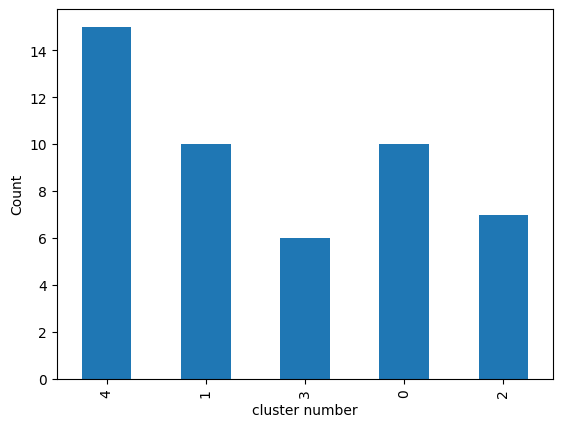

In [66]:
kmean = KMeans(init='random',n_clusters=5, random_state=0)
kmean.fit(df_fts_std)
labels = pd.Series(kmean.labels_, name='cluster_number')
print(labels.value_counts(sort=False))
ax= labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('Count')

C:\Users\tsukasa.monma\Anaconda3\envs\plotly\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tsukasa.monma\Anaconda3\envs\plotly\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tsukasa.monma\Anaconda3\envs\plotly\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tsukasa.monma\Anaconda3\envs\plotly\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\tsukasa.monma\Anaconda3

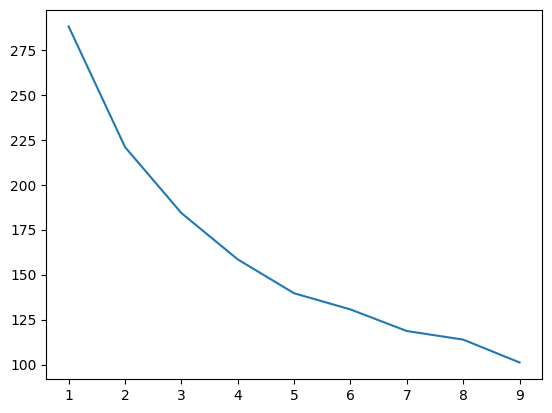

In [67]:
import matplotlib.pyplot as plt
dist_list = []
for i in range(1, 10):
    kmeans =KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(df_fts_std)
    dist_list.append(kmeans.inertia_)

plt.plot(range(1,10), dist_list)

In [68]:
df_fts_label= pd.concat([df_fts, labels], axis=1)
df_fts_label

,Country,GDP_per_cap,PAL_penet_under_45,BLC_penet,ttl_purchase_cycle,Num_outlet_per_cor_pop,PAL_price_Low,cluster_number
0,France,43.070392,70.000000,36.000000,2.691229,0.252763,35.000000,4
1,Germany,51.896396,62.000000,6.100000,2.881730,0.199982,30.000000,4
2,Italy,36.826522,27.000000,7.400000,3.800387,0.264650,32.000000,1
3,Spain,30.503863,68.000000,22.940000,4.017396,0.276296,22.575000,1
4,United Kingdom,46.768595,40.000000,7.950443,2.874770,0.127336,17.589926,4
5,Austria,56.477258,48.200000,19.700000,2.811239,0.199285,45.000000,4
6,Belgium,53.717236,70.000000,20.100000,2.402918,0.224207,30.000000,4
7,Denmark,68.960558,71.000000,11.100000,3.961515,0.167598,19.221556,4
8,Finland,54.413781,72.000000,21.900000,2.884488,0.176138,20.000000,4
9,Ireland,117.247878,40.000000,35.173429,3.319385,0.122283,15.000000,4


In [80]:
# 分割のための区切りを設定
bins = [0,20,30,40,50,60,70,80]

# 上の区切りをもとに金融機関のデータを分割し、qct_PAL変数に各データのを設定
qct_PAL = pd.cut(df_fts_label_c.PAL_penet_under_45, bins,right= False)

df= pd.concat([df_fts_label.cluster_number,qct_PAL],axis=1)
              
cross_cluster_pal = df.groupby(['cluster_number', 'PAL_penet_under_45']).size().unstack().fillna(0)
cross_cluster_pal

PAL_penet_under_45,"[0, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)","[60, 70)","[70, 80)"
cluster_number,,,,,,,
0,4,2,3,1,0,0,0
1,3,2,3,1,0,1,0
2,4,0,2,1,0,0,0
3,1,0,1,3,1,0,0
4,0,0,1,4,3,2,5


In [81]:
# 分割したデータ数をカウント
hist_pal = pd.value_counts(qct_PAL)
hist_pal

PAL_penet_under_45
[0, 20)     12
[30, 40)    10
[40, 50)    10
[70, 80)     5
[20, 30)     4
[50, 60)     4
[60, 70)     3
Name: count, dtype: int64

<Axes: xlabel='PAL_penet_under_45', ylabel='cluster_number'>

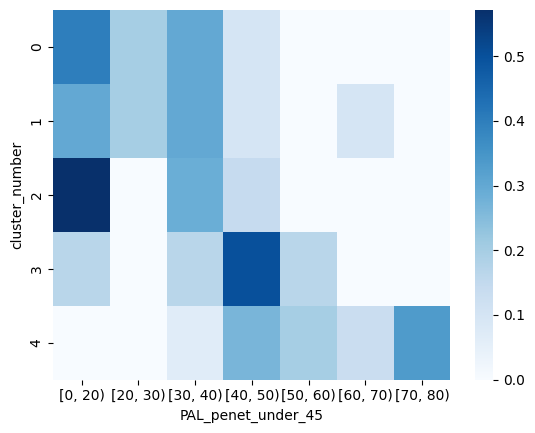

In [82]:
import seaborn as sns
sns.heatmap(cross_cluster_pal.apply(lambda x : x/x.sum(), axis=1), cmap='Blues')

In [83]:
# 分割のための区切りを設定
bins = [0,10,20,30,40, 50, 60]

# 上の区切りをもとに金融機関のデータを分割し、qct_PAL変数に各データのを設定
qct_pal_low_price = pd.cut(df_fts_label.PAL_price_Low, bins,right= False)

df_pal_price_low= pd.concat([df_fts_label.cluster_number,qct_pal_low_price],axis=1)
              
cross_cluster_pal_low_price = df_pal_price_low.groupby(['cluster_number', 'PAL_price_Low']).size().unstack().fillna(0)
cross_cluster_pal_low_price

PAL_price_Low,"[0, 10)","[10, 20)","[20, 30)","[30, 40)","[40, 50)","[50, 60)"
cluster_number,,,,,,
0,4,3,3,0,0,0
1,0,0,5,4,0,1
2,4,3,0,0,0,0
3,0,4,2,0,0,0
4,0,6,3,5,1,0


<Axes: xlabel='PAL_price_Low', ylabel='cluster_number'>

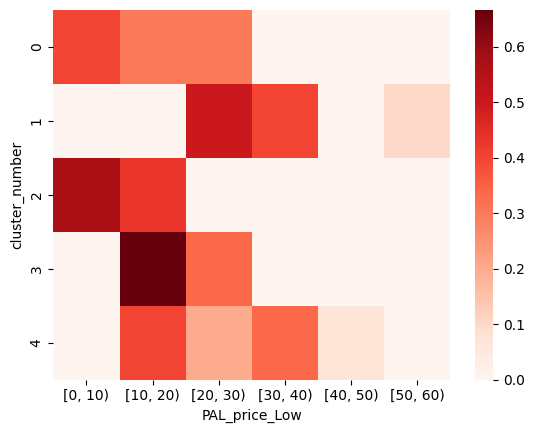

In [85]:
sns.heatmap(cross_cluster_pal_low_price.apply(lambda x : x/x.sum(), axis=1), cmap='Reds')

In [95]:

file_path = "./raw_data/" + "df_general_45.csv"
df_total_p= pd.read_csv(file_path, usecols= ["Country","Population(x000)","Spectacle PAL Lenses(%)","Spectacle PAL Lenses.1(x000)"],index_col= 0)


df_p= pd.read_csv("./raw_data/df_general.csv", usecols =["Country","Population(x000)"],index_col= 0)
df_gdp= pd.read_csv("./raw_data/df_GDP.csv", usecols = ["Country",'GDP(USD)'],index_col= 0 )
df_gdp["GDP_per_cap"] =df_gdp.loc[:,"GDP(USD)" ]/df_p.loc[:,"Population(x000)"]

df_defect_p= pd.read_csv('./raw_data/df_general_visionDefect.csv', usecols = ["Country","Presbyopia(x000)"],index_col= 0)
df_tmp = pd.merge(df_gdp, df_defect_p, left_index=True, right_index=True)
df_tmp = pd.merge(df_tmp, df_total_p, left_index=True, right_index=True)
df_tmp.reset_index(inplace=True)
df_tmp
# fig = px.scatter(
#     df_tmp,
#     x="GDP_per_cap(X000 USD)",
#     y="Spectacle PAL Lenses(%)",
#     size="Spectacle PAL Lenses.1(x000)",
#     color="Spectacle PAL Lenses.1(x000)",
#     hover_name="Country",
#     height=600,
#     width=600,
#     log_x=True,
#     size_max=60,
# )

# tab1, tab2 = st.tabs(["Streamlit theme (default)", "Plotly native theme"])
# with tab1:
#     # Use the Streamlit theme.
#     # This is the default. So you can also omit the theme argument.
#     st.plotly_chart(fig, theme="streamlit", use_container_width=True)
# with tab2:
#     # Use the native Plotly theme.
#     st.plotly_chart(fig, theme=None, use_container_width=True)
# # st.plotly_chart(fig)

,Country,GDP(USD),GDP_per_cap,Presbyopia(x000),Population(x000),Spectacle PAL Lenses(%),Spectacle PAL Lenses.1(x000)
0,France,2923489,43.070392,32852.580770,32086.5500,70.000000,21225.252830
1,Germany,4308854,51.896396,39853.735200,42342.0950,62.000000,22051.763080
2,Italy,2169745,36.826522,24156.702260,32367.2300,27.000000,7498.192502
3,Spain,1492432,30.503863,11350.832000,25639.0000,68.000000,14296.306400
4,United Kingdom,3158938,46.768595,18237.037140,30227.3300,40.000000,10640.020160
5,Austria,506601,56.477258,4036.940550,4365.9920,48.200000,1788.746922
6,Belgium,624248,53.717236,5926.839540,5362.4770,70.000000,3265.748493
7,Denmark,405626,68.960558,1588.257450,2750.1520,71.000000,1718.294970
8,Finland,301670,54.413781,3003.551347,2671.8840,72.000000,1692.905702
9,Ireland,594095,117.247878,1368.299250,2046.2660,40.000000,515.659032
